Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a lot of variables that could be made into a modelable binary outcome.

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

Vanilla logistic regression
Ridge logistic regression
Lasso logistic regression
If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value.

In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

Record your work and reflections in a notebook to discuss with your mentor.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

types = {'Population':int, 'Violent\ncrime':int, 'Murder and\nnonnegligent\nmanslaughter':int, 'Robbery':int}

# Load the dataset
data = pd.read_csv('C:\\Users\\maken\\table_8_offenses_known_to_law_enforcement_mississippi_by_city_2013.csv', skiprows = 4, skipfooter = 2, thousands = ',')

C:\Users\maken\lib\site-packages\ipykernel\__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [2]:
# Convert string number values to ints
for value in types:
    value.str(',')
print(types)

AttributeError: 'str' object has no attribute 'str'

In [4]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Unnamed: 13
0,Aberdeen,5473,9,0,NaN,1.0,4,4,172,40,127,5,0,NaN
1,Amory,7167,5,0,NaN,1.0,2,2,265,81,181,3,2,NaN
2,Batesville,7417,18,2,NaN,1.0,5,10,447,72,360,15,1,NaN
3,Biloxi,44744,213,3,36.0,NaN,90,84,2316,703,1482,131,6,NaN
4,Byhalia,1270,10,0,NaN,0.0,0,10,71,19,51,1,0,NaN


In [3]:
data.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Unnamed: 13
34,Southaven,50801,168,0,NaN,9.0,20,139,1455,210,1189,56,3,NaN
35,Starkville,24519,42,1,NaN,1.0,11,29,608,125,472,11,0,NaN
36,Vicksburg,23318,110,5,NaN,23.0,14,68,1260,275,915,70,6,NaN
37,West Point,11179,54,1,NaN,5.0,14,34,392,162,229,1,0,NaN
38,Wiggins,4535,8,0,NaN,3.0,2,3,116,29,84,3,0,NaN


In [13]:
# Create fifteen features

data.loc['pop_under_10k'] = False
data.loc[data['Population'] < 10000, 'pop_under_10k'] = True
data.loc[:,'pop_10k_to_20k'] = False
data.loc[(data['Population'] < 10000) & (data['Population'] < 20000), 'pop_10k_to_20k'] = True
data['pop_20k_to_30k'] = False
data.loc[(data['Population'] > 20000) & (data['Population'] < 30000), 'pop_20k_to_30k'] = True
data['pop_30k_to_40k'] = False
data.loc[(data['Population'] > 30000) & (data['Population'] < 40000), 'pop_30k_to_40k'] = True
data['pop_40k+'] = False
data.loc[data['Population'] > 40000, 'pop_40k+'] = True
data['violent_crime_over_fifty'] = False
data.loc[data['Violent\ncrime'] > 50, 'violent_crime_over_fifty'] = True
data['rape_over_ten'] = False
data.loc[data['Rape\n(legacy\ndefinition)2'] > 10, 'rape_over_ten'] = True
data['murder_over_five'] = False
data.loc[data['Murder and\nnonnegligent\nmanslaughter'] > 5, 'murder_over_five'] = True
data['robbery_over_ten'] = False
data.loc[data['Robbery'] > 10, 'robbery_over_ten'] = True
data['assault_over_100'] = False
data.loc[data['Aggravated\nassault'] > 100, 'assault_over_100'] = True
data['prop_crime_over_1000'] = False
data.loc[data['Property\ncrime'] > 1000, 'prop_crime_over_1000'] = True
data['burglary_over_150'] = False
data.loc[data['Burglary'] > 150, 'burglary_over_150'] = True
data['theft_over_500'] = False
data.loc[data['Larceny-\ntheft'] > 500, 'theft_over_500'] = True
data['motor_theft_over_50'] = False
data.loc[data['Motor\nvehicle\ntheft'] > 50, 'motor_theft_over_50'] = True
data['arson_over_2'] = False
data.loc[data['Arson'] > 2, 'arson_over_2'] = True

In [14]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,...,violent_crime_over_fifty,rape_over_ten,murder_over_five,robbery_over_ten,assault_over_100,prop_crime_over_1000,burglary_over_150,theft_over_500,motor_theft_over_50,arson_over_2
0,Aberdeen,5473,9,0,NaN,1,4,4,172,40,...,False,False,False,False,False,False,False,False,False,False
1,Amory,7167,5,0,NaN,1,2,2,265,81,...,False,False,False,False,False,False,False,False,False,False
2,Batesville,7417,18,2,NaN,1,5,10,447,72,...,False,False,False,False,False,False,False,False,False,False
3,Biloxi,44744,213,3,36,NaN,90,84,2316,703,...,True,False,False,True,False,True,True,True,True,True
4,Byhalia,1270,10,0,NaN,0,0,10,71,19,...,False,False,False,False,False,False,False,False,False,False


In [34]:
from sklearn.linear_model import LogisticRegression

# Vanilla Logist Regression
lr = LogisticRegression(C=1e9)

y = data['violent_crime_over_fifty'].ravel()
X = data[['pop_under_10k', 'pop_10k_to_20k', 'pop_20k_to_30k', 'pop_30k_to_40k', 'pop_40k+', 'rape_over_ten', 'murder_over_five', 'robbery_over_ten', 'assault_over_100', 'prop_crime_over_1000', 'burglary_over_150', 'theft_over_500', 'motor_theft_over_50', 'arson_over_2']] #.values.reshape(-1,1)

fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[  1.10155053   1.10155053  -9.06448746   2.63767772   0.10456175
    1.76552935   6.723807     7.36282725  -0.0556735    2.01885631
   11.16642934   8.79472877   0.43804498   6.0138143 ]]
[-17.83612354]

 Accuracy
col_0  False  True 
row_0              
False     24      0
True       1     15

 Percentage accuracy
0.975


In [44]:
# Lasso Logistic Regression
lass = linear_model.Lasso(alpha=0.025)
lassfit = lass.fit(X, y)


# Display.
print('Coefficients')
print(lassfit.coef_)
print(lassfit.intercept_)

lpred_y_sklearn = lassfit.predict(X)
print('\n Accuracy')
print(pd.crosstab(lpred_y_sklearn, y))


print('\n Percentage accuracy')
print(lass.score(X, y))

Coefficients
[-0.         -0.         -0.          0.          0.          0.          0.
  0.08024647  0.          0.          0.54509148  0.22279802  0.
  0.04718964]
0.0347674740363

 Accuracy
col_0     False  True 
row_0                 
0.034767     19      0
0.081957      1      0
0.115014      1      0
0.162204      1      0
0.257565      1      0
0.337812      1      0
0.385002      0      1
0.660105      1      2
0.882903      0      3
0.930093      0      9

 Percentage accuracy
0.852819700201


In [78]:
# Find which variables were not dropped in lasso (coef != 0) and 
#      use them for the variables in ridge
# Join a range from 0 to 1 by .2 with a range from 1 to 300 by 2

# Drop columns: 1,2,3,4,5,6,7,9,10,13

from sklearn import linear_model
from sklearn import preprocessing


X2 = data[['robbery_over_ten', 'burglary_over_150', 'theft_over_500', 'arson_over_2']]

ridge = pd.DataFrame(columns = ('alpha', 'r_squared', 'coef_'))

ridge.alpha = np.concatenate((np.arange(.1,1,.2), np.arange(1,300,2)), axis=0)

#ridge.alpha = (np.arange(1,300,2))

for alpha in ridge.alpha:
    r_reg = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    r_reg.fit(X2, y)
    ridge.loc[ridge.alpha==alpha,'r_squared'] = r_reg.score(X2, y)
    ridge.loc[ridge.alpha==alpha, 'coef_'] = [[r_reg.coef_]]

In [79]:
print(ridge)

     alpha r_squared                                              coef_
0      0.1  0.868403  [[0.0806674786754, 0.581182357448, 0.246972381...
1      0.3  0.867809  [[0.102498727997, 0.553081721521, 0.2456862678...
2      0.5  0.866875  [[0.120182925053, 0.529434039207, 0.2445020535...
3      0.7  0.865751  [[0.134731668221, 0.509199541967, 0.2433961311...
4      0.9  0.864523  [[0.146855341615, 0.491642909957, 0.2423513682...
5      1.0  0.863885  [[0.152173913043, 0.483695652174, 0.2418478260...
6      3.0  0.850883  [[0.205397301349, 0.386973180077, 0.2331334332...
7      5.0  0.838197  [[0.220051206037, 0.339644252796, 0.2254750033...
8      7.0  0.825068  [[0.223543519536, 0.309483361647, 0.2182971919...
9      9.0  0.811174  [[0.222620380739, 0.287588652482, 0.2115061590...
10    11.0  0.796502  [[0.219678408223, 0.270435664551, 0.2050745860...
11    13.0  0.781152  [[0.215756012982, 0.256324189748, 0.1989841283...
12    15.0  0.765253  [[0.211362016409, 0.244321772143, 0.193216

0
0.042657918922


ValueError: x and y must have same first dimension, but have shapes (155,) and (1,)

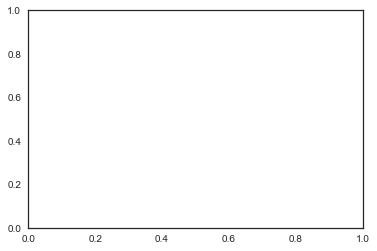

In [86]:
labels = []

varstoplot = list(X2)

for index,var in enumerate(varstoplot):
    print(index)
    print(r_reg.coef_[0])
    plt.plot(ridge.alpha, r_reg.coef_[index])
    labels.append(var)

# Comparison of the Models:
    WRITE A COMPARISON OF THE MODELS HERE. 